# Volume 3 Project

This is where we will work on our volume 3 project. Remember to pull before working and to push after making any edits!

In [83]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

# Question 2 
### For profit schools

In [58]:
colleges_joined = pd.read_csv('cleaned_dataframe.csv')


In [60]:
profit_data = colleges_joined[['asian_or_pacific_share_fall_2000', 'black_share_fall_2000',
       'hisp_share_fall_2000', 'alien_share_fall_2000', 'par_median',
        'par_q1', 'par_top1pc', 'type']]

print((profit_data.columns[profit_data.isnull().any()]))
profit_data = profit_data.dropna()

profit_col = profit_data['type']
profit_col = [0 if x==1 or x==0 else 1 for x in profit_col]
profit_data = profit_data.drop(columns='type')

train_x, test_x, train_y, test_y = train_test_split(profit_data, profit_col, train_size=.7)
param_grid = {'max_depth': [1,2,4,6,8,10,12,14],
              'min_samples_leaf': [6,10, 15,20]}
rf = RandomForestClassifier(max_depth=8)
gs = GridSearchCV(rf, param_grid, scoring='f1', n_jobs=-1)
gs.fit(train_x, train_y)
preds = gs.predict(test_x)
print(gs.best_params_)
print(classification_report(test_y, preds))
print(confusion_matrix(test_y, preds))



#could be interesting to to just on race and income

Index(['asian_or_pacific_share_fall_2000', 'black_share_fall_2000',
       'hisp_share_fall_2000', 'alien_share_fall_2000', 'par_median', 'par_q1',
       'par_top1pc', 'type'],
      dtype='object')
{'max_depth': 10, 'min_samples_leaf': 6}
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       364
           1       0.82      0.73      0.77       293

    accuracy                           0.81       657
   macro avg       0.81      0.80      0.81       657
weighted avg       0.81      0.81      0.81       657

[[317  47]
 [ 78 215]]


In [61]:
rf = RandomForestClassifier(max_depth=12, min_samples_leaf=6)

rf.fit(train_x, train_y)
preds = rf.predict(test_x)
print(classification_report(test_y, preds))
print(confusion_matrix(test_y, preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       364
           1       0.82      0.72      0.77       293

    accuracy                           0.80       657
   macro avg       0.81      0.80      0.80       657
weighted avg       0.81      0.80      0.80       657

[[318  46]
 [ 83 210]]


Feature 0: % asian or pacific islander, Score: 0.12812
Feature 1: % black, Score: 0.05224
Feature 2: % hispanic, Score: 0.07280
Feature 3: % nonresident alien, Score: 0.11473
Feature 4: median parent income, Score: 0.12935
Feature 5: % of students with parents in the bottom 20% of income distribution, Score: 0.20577
Feature 6: % of students with parents in the top 1% of income distribution, Score: 0.29700


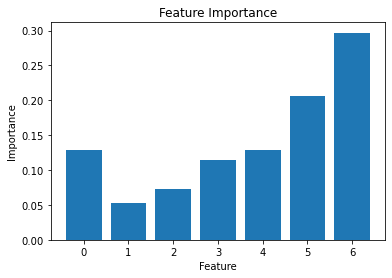

In [81]:
importance = rf.feature_importances_
features = ['% asian or pacific islander',
            '% black',
            '% hispanic',
            '% nonresident alien',
            'median parent income',
            '% of students with parents in the bottom 20% of income distribution',
            '% of students with parents in the top 1% of income distribution']
for i,(f,v) in enumerate(zip(features, importance)):
    print('Feature %0d: %s, Score: %.5f' % (i,f,v))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

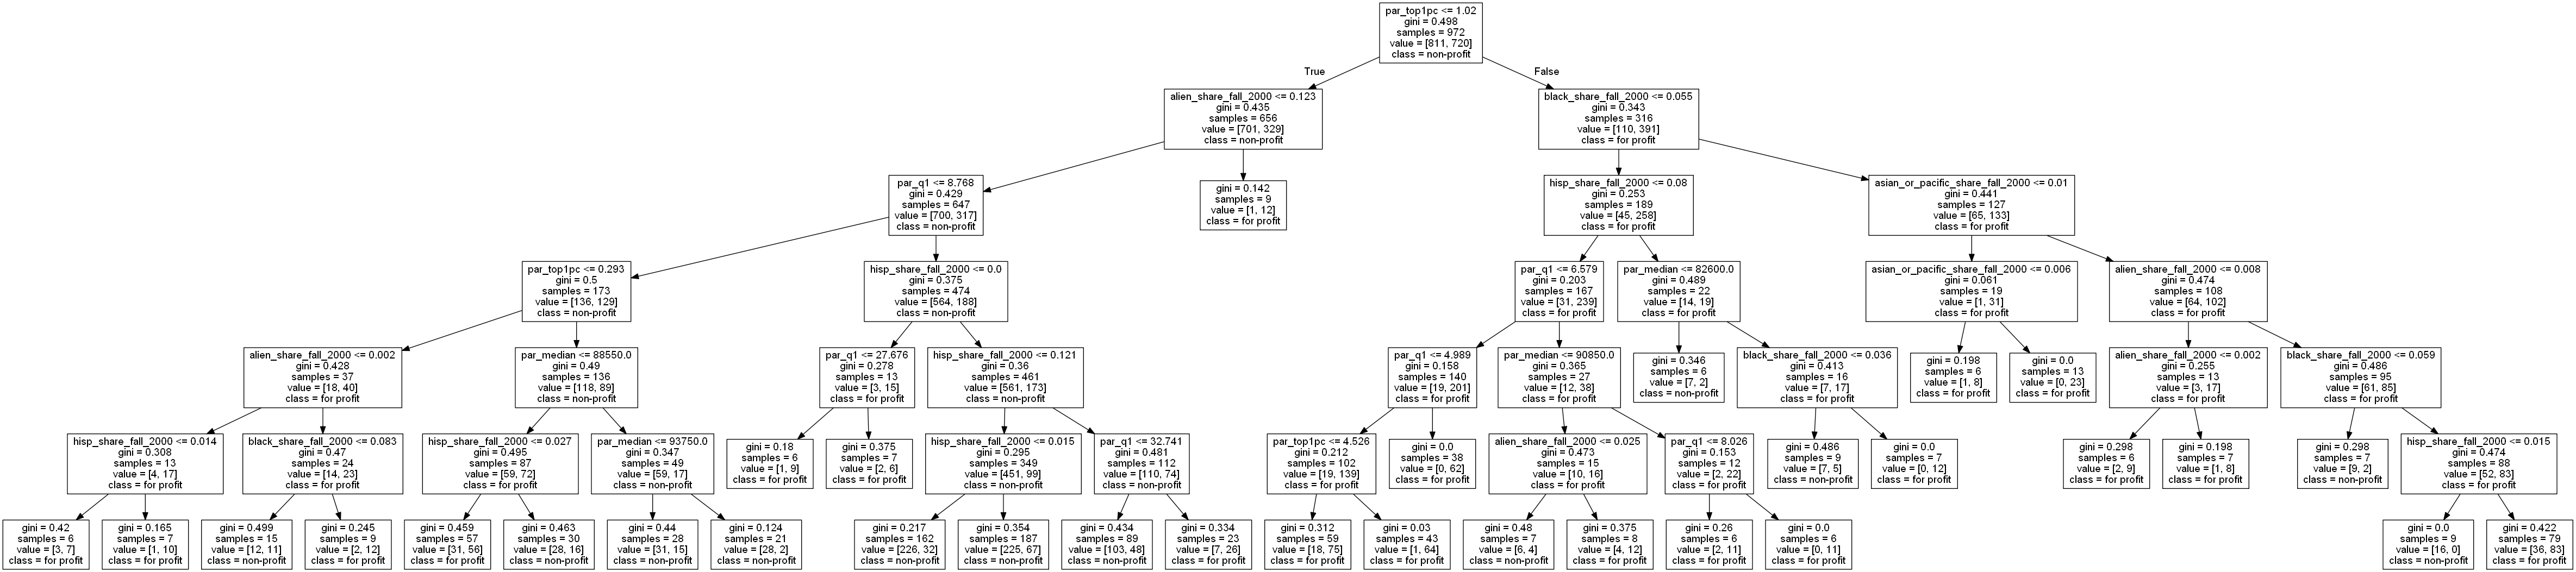

In [63]:
tree = rf.estimators_[0]
dot_data = export_graphviz(tree, feature_names=profit_data.columns.values, class_names=['non-profit', 'for profit'])
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")
Image('decision_tree_graphivz.png')

In [84]:
linear = LogisticRegression()
linear.fit(train_x, train_y)
preds = linear.predict(test_x)
preds = [0 if pred<=.5 else 1 for pred in preds]
print(classification_report(test_y, preds))
print(linear.coef_)

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       364
           1       0.84      0.50      0.63       293

    accuracy                           0.74       657
   macro avg       0.77      0.71      0.71       657
weighted avg       0.76      0.74      0.72       657

[[-4.09665629e-03  8.04612847e-03  1.22709924e-02  8.37766590e-03
  -9.63426464e-06 -1.75208236e-02  7.61498364e-01]]


In [65]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(train_x, train_y)
preds = knn.predict(test_x)
print(classification_report(test_y, preds))
print(confusion_matrix(test_y, preds))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       364
           1       0.57      0.55      0.56       293

    accuracy                           0.61       657
   macro avg       0.61      0.61      0.61       657
weighted avg       0.61      0.61      0.61       657

[[241 123]
 [131 162]]
